# 데이터 수집

In [41]:
import yfinance as yf
import pandas as pd

def yen_indicator():
    tickers = {
        "Nikkei225": "^N225",
        "TOPIX": "^TOPX",
        "Mothers": "^MTHR"
    }
    
    data_list = []
    
    for name, symbol in tickers.items():
        ticker = yf.Ticker(symbol)
        df = ticker.history(period="25y", interval="1d")
        df = df.reset_index()
        
    
        df = df[["Date", "Open", "High", "Low", "Close"]]
        df = df.rename(columns={
            "Open": f"{name}_Open",
            "High": f"{name}_High",
            "Low": f"{name}_Low",
            "Close": f"{name}_Close"
        })
        df["Date"] = pd.to_datetime(df["Date"]).dt.tz_localize(None)
        data_list.append(df)
    
    df_merged = data_list[0]
    for df in data_list[1:]:
        df['Date']=pd.to_datetime(df['Date'])
        df_merged = pd.merge(df_merged, df, on="Date", how="inner")
    
    df_merged['Date'] = pd.to_datetime(df_merged['Date']).dt.strftime('%Y-%m-%d')
    df_merged['Date'] = pd.to_datetime(df_merged['Date'])
    return df_merged

In [42]:
import cloudpickle
with open("yen_indicator.pkl", "wb") as f:
    cloudpickle.dump(yen_indicator, f)

In [43]:
japan_indi_df=japan_indicator()

In [44]:
def real_times(symbol):
    ticker = yf.Ticker(symbol)
    df = ticker.history(period=f"25y", interval="1d")
    
    df = df.copy()
    df = df[["Open", "High", "Low", "Close"]]
    df.columns = [f"{col}" for col in df.columns]
    df["Date"] = df.index.date
    df.reset_index(drop=True, inplace=True)
    # 변동량 계산
    df["Change"] = df["Close"].diff()
    
    df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
    
    df=df.reindex(columns=['Date','Close','Open','High','Low','Change'])
    return df

In [45]:
import cloudpickle
with open("real_times.pkl", "wb") as f:
    cloudpickle.dump(real_times, f)

In [46]:
yen_df=real_times('JPYKRW=X')

In [47]:
all_df=pd.merge(japan_indi_df,yen_df,on='Date',how='inner')

In [48]:
all_df

Date  Nikkei225_Open  Nikkei225_High  Nikkei225_Low  \
0    2013-03-04    11695.450195    11767.679688   11613.589844   
1    2013-03-05    11732.570312    11779.419922   11666.379883   
2    2013-03-06    11811.059570    11933.820312   11803.089844   
3    2013-03-07    12037.250000    12069.599609   11946.009766   
4    2013-03-08    12066.500000    12283.620117   12065.089844   
...         ...             ...             ...            ...   
1971 2021-09-01    28179.039062    28457.669922   28179.039062   
1972 2021-09-02    28522.460938    28626.199219   28412.910156   
1973 2021-09-03    28626.480469    29149.650391   28607.869141   
1974 2021-09-30    29569.189453    29622.269531   29311.339844   
1975 2021-10-01    29235.109375    29393.669922   28680.730469   

      Nikkei225_Close   TOPIX_Open   TOPIX_High    TOPIX_Low  TOPIX_Close  \
0        11652.290039   991.700012  1001.150024   989.760010   992.250000   
1        11683.450195   998.489990  1000.630005   987.479980   988.619995   
2        11932.269531   998.900024  1003.219971   995.330017  1003.219971   
3        11968.080078  1009.549988  1012.619995  1002.179993  1004.349976   
4        12283.620117  1009.090027  1021.849976  1009.080017  1020.500000   
...               ...          ...          ...          ...          ...   
1971     28451.019531  1965.739990  1982.489990  1965.540039  1980.790039   
1972     28543.509766  1981.530029  1987.449951  1973.660034  1983.569946   
1973     29128.109375  1988.579956  2018.569946  1987.479980  2015.449951   
1974     29452.660156  2040.000000  2041.819946  2023.599976  2030.160034   
1975     28771.070312  2010.400024  2020.569946  1982.199951  1986.310059   

      Mothers_Open  Mothers_High  Mothers_Low  Mothers_Close      Close  \
0       605.859985    615.780029   604.419983     612.380005  11.330000   
1       613.440002    620.119995   604.520020     610.679993  11.667000   
2       609.539978    627.409973   607.950012     625.409973  11.636000   
3       627.659973    638.000000   625.409973     628.429993  11.535000   
4       631.260010    633.729980   612.919983     614.580017  11.446000   
...            ...           ...          ...            ...        ...   
1971   1132.530029   1137.589966  1117.689941    1136.260010  10.525254   
1972   1135.770020   1138.449951  1119.260010    1120.430054  10.493340   
1973   1119.800049   1127.829956  1111.349976    1117.209961  10.524157   
1974   1126.060059   1130.339966  1111.319946    1127.619995  10.606549   
1975   1122.030029   1145.589966  1121.530029    1131.060059  10.630069   

           Open       High        Low    Change  
0     11.332000  11.694000  11.314000 -0.370000  
1     11.667000  11.683000  11.604000  0.337000  
2     11.636000  11.647000  11.554000 -0.031000  
3     11.554000  11.573000  11.470000 -0.101000  
4     11.434000  11.477000  11.277000 -0.089000  
...         ...        ...        ...       ...  
1971  10.526694  10.531381  10.473089 -0.082153  
1972  10.492649  10.564181  10.490873 -0.031915  
1973  10.524152  10.542774  10.484832  0.030817  
1974  10.608268  10.621011  10.555364 -0.034727  
1975  10.619371  10.695339  10.601969  0.023520  

[1976 rows x 18 columns]

In [49]:
df_base=all_df

In [50]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 하루 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
📊 XGBoost
    MAE:  0.0488
    RMSE: 0.0651
    R²:   0.9755
📊 LSTM
    MAE:  0.0723
    RMSE: 0.0970
    R²:   0.9456
📊 RandomForest
    MAE:  0.0431
    RMSE: 0.0585
    R²:   0.9802


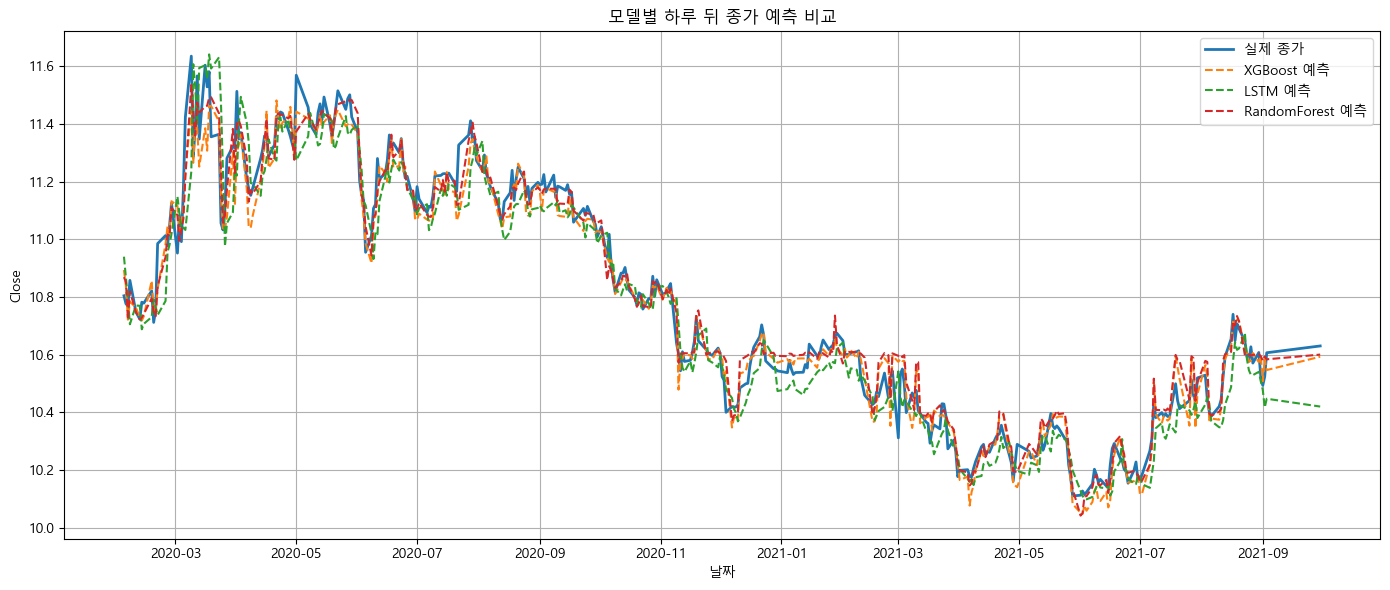

In [51]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()  # 기존 df_base를 유지
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-1)
df = df.dropna().reset_index(drop=True)

# 3. 피처, 타겟 설정
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. 정규화
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. 모델 훈련 및 예측
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 복원
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. 성능 출력
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"📊 {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R²:   {r2:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest 예측', linestyle='--')
plt.title("모델별 하루 뒤 종가 예측 비교")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
import joblib
joblib.dump(model_rf, 'yen_하루.pkl')
joblib.dump(scaler_X, 'yen_scaler_X_하루.pkl')
joblib.dump(scaler_y, 'yen_scaler_y_하루.pkl')

['yen_scaler_y_하루.pkl']

# 일주일 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
📊 XGBoost
    MAE:  0.1397
    RMSE: 0.1745
    R²:   0.8240
📊 LSTM
    MAE:  0.1513
    RMSE: 0.1899
    R²:   0.7917
📊 RandomForest
    MAE:  0.1478
    RMSE: 0.1889
    R²:   0.7938


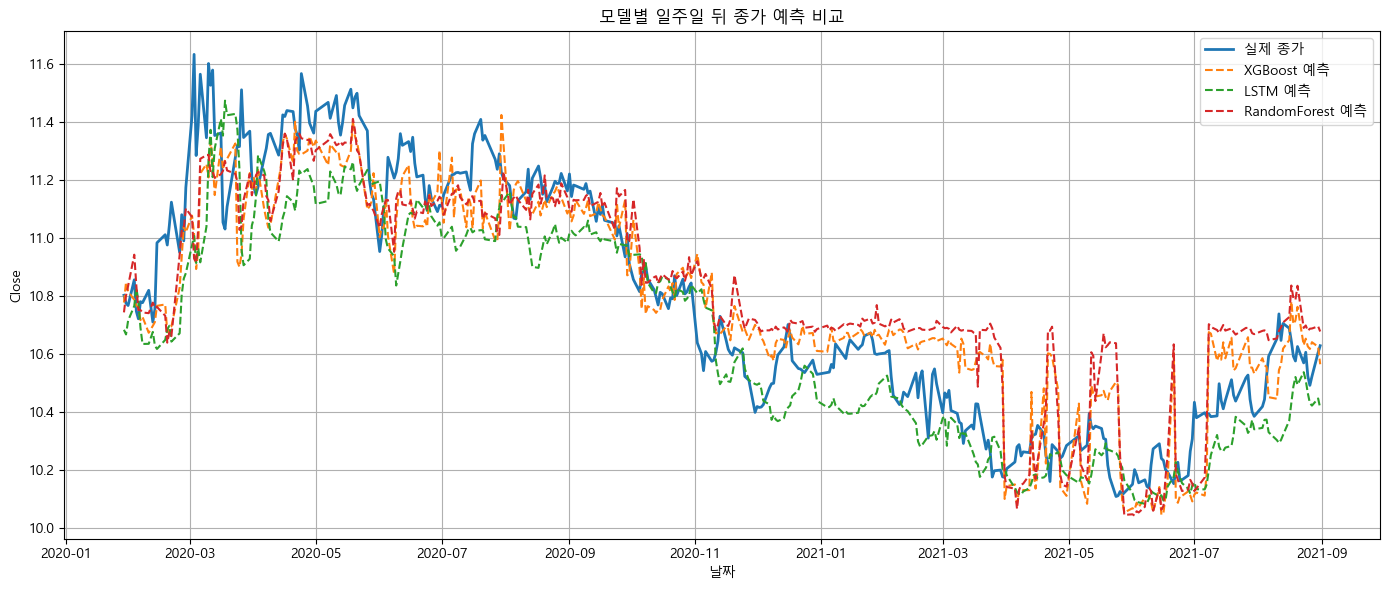

In [53]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()  # 기존 df_base를 유지
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-5)
df = df.dropna().reset_index(drop=True)

# 3. 피처, 타겟 설정
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. 정규화
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. 모델 훈련 및 예측
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 복원
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. 성능 출력
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"📊 {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R²:   {r2:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest 예측', linestyle='--')
plt.title("모델별 일주일 뒤 종가 예측 비교")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
import joblib
joblib.dump(model_lstm, 'yen_일주일.pkl')
joblib.dump(scaler_X, 'yen_scaler_X_일주일.pkl')
joblib.dump(scaler_y, 'yen_scaler_y_일주일.pkl')

['yen_scaler_y_일주일.pkl']

# 한달 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
📊 XGBoost
    MAE:  0.3024
    RMSE: 0.3722
    R²:   0.2061
📊 LSTM
    MAE:  0.2241
    RMSE: 0.2936
    R²:   0.5062
📊 RandomForest
    MAE:  0.2718
    RMSE: 0.3311
    R²:   0.3720


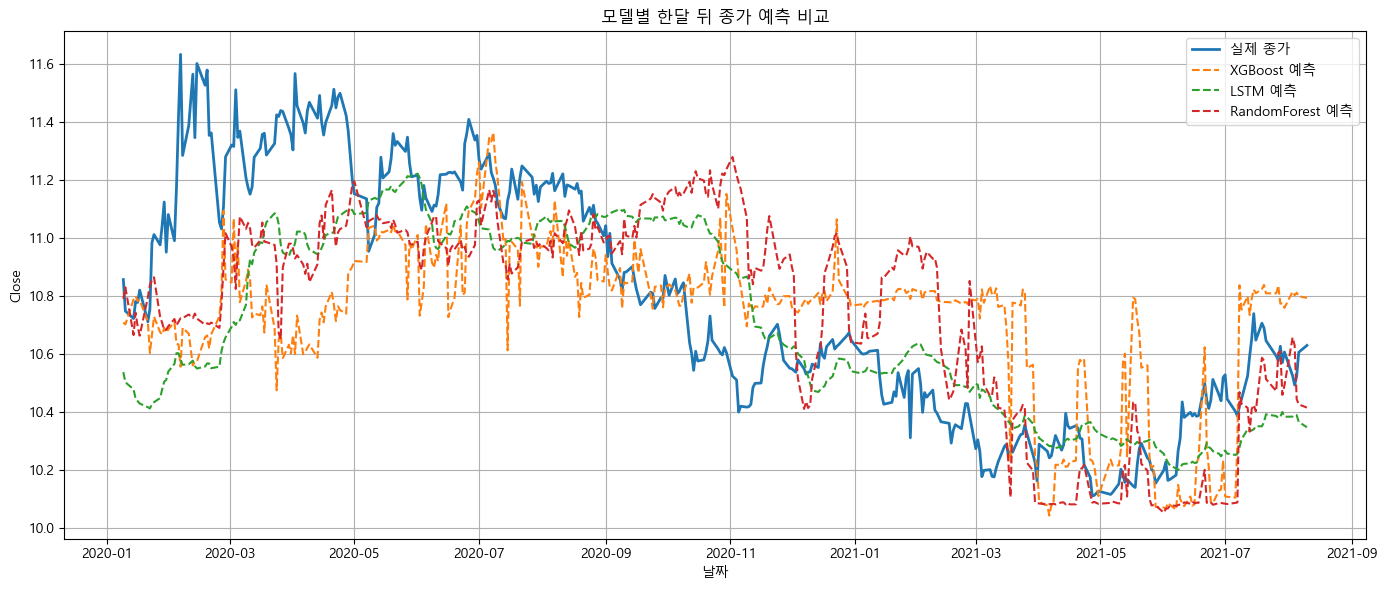

In [55]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()  # 기존 df_base를 유지
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-20)
df = df.dropna().reset_index(drop=True)

# 3. 피처, 타겟 설정
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. 정규화
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. 모델 훈련 및 예측
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 복원
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. 성능 출력
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"📊 {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R²:   {r2:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest 예측', linestyle='--')
plt.title("모델별 한달 뒤 종가 예측 비교")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
import joblib
joblib.dump(model_lstm, 'yen_한달.pkl')
joblib.dump(scaler_X, 'yen_scaler_X_한달.pkl')
joblib.dump(scaler_y, 'yen_scaler_y_한달.pkl')

['yen_scaler_y_한달.pkl']

# 세달 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
📊 XGBoost
    MAE:  0.4112
    RMSE: 0.4900
    R²:   -0.3467
📊 LSTM
    MAE:  0.2082
    RMSE: 0.2525
    R²:   0.6423
📊 RandomForest
    MAE:  0.4101
    RMSE: 0.4877
    R²:   -0.3338


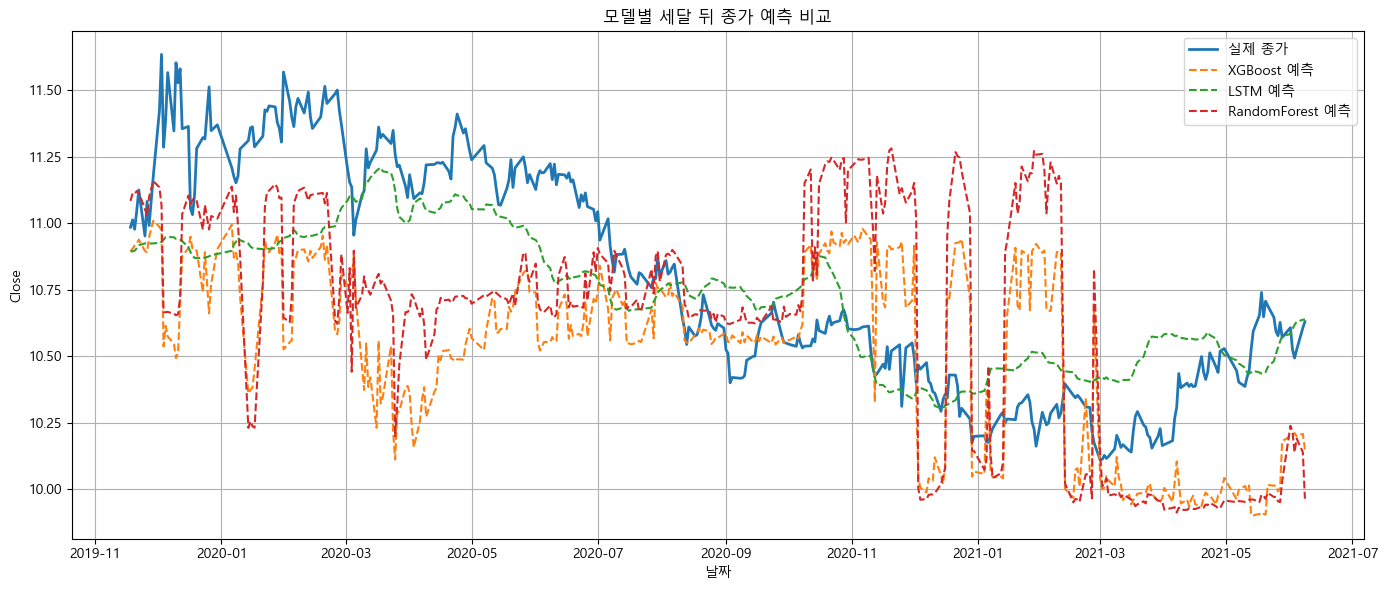

In [57]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()  # 기존 df_base를 유지
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-60)
df = df.dropna().reset_index(drop=True)

# 3. 피처, 타겟 설정
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. 정규화
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. 모델 훈련 및 예측
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 복원
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. 성능 출력
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"📊 {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R²:   {r2:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest 예측', linestyle='--')
plt.title("모델별 세달 뒤 종가 예측 비교")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:
import joblib
joblib.dump(model_lstm, 'yen_세달.pkl')
joblib.dump(scaler_X, 'yen_scaler_X_세달.pkl')
joblib.dump(scaler_y, 'yen_scaler_y_세달.pkl')

['yen_scaler_y_세달.pkl']

|모델|하루|일주일|한달|세달|
|---|---|---|---|---|
|XGBoost|0.9755|0.8240|0.2061|-0.3467|
|LSTM|0.9432|0.8690|0.4288|0.4536|
|RandomForest|0.9802|0.7938|0.3720|-0.3338|
||||||
|최종모델|RandomForest|LSTM|LSTM|LSTM

In [59]:
def yen_predict_하루(new_df):
    import joblib
    
    scaler_X = joblib.load(f'yen_scaler_X_하루.pkl')

    scaler_y = joblib.load(f'yen_scaler_y_하루.pkl')
    
    model_rf = joblib.load(f'yen_하루.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_flat = X_new_scaled[seq_len:]

    y_pred_rf = model_rf.predict(X_new_flat)
    
    y_pred_rf = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1)).reshape(-1)

    # 6. 결과 반환
    return y_pred_rf

with open("yen_predict_하루.pkl", "wb") as f:
    cloudpickle.dump(yen_predict_하루, f)

In [60]:
def yen_predict_일주일(new_df):
    import joblib
    
    scaler_X = joblib.load(f'yen_scaler_X_일주일.pkl')

    scaler_y = joblib.load(f'yen_scaler_y_일주일.pkl')
    
    model_lstm = joblib.load(f'yen_일주일.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. 결과 반환
    return y_pred_lstm

with open("yen_predict_일주일.pkl", "wb") as f:
    cloudpickle.dump(yen_predict_일주일, f)

In [61]:
def yen_predict_한달(new_df):
    import joblib
    
    scaler_X = joblib.load(f'yen_scaler_X_한달.pkl')

    scaler_y = joblib.load(f'yen_scaler_y_한달.pkl')
    
    model_lstm = joblib.load(f'yen_한달.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. 결과 반환
    return y_pred_lstm

with open("yen_predict_한달.pkl", "wb") as f:
    cloudpickle.dump(yen_predict_한달, f)

In [62]:
def yen_predict_세달(new_df):
    import joblib
    
    scaler_X = joblib.load(f'yen_scaler_X_세달.pkl')

    scaler_y = joblib.load(f'yen_scaler_y_세달.pkl')
    
    model_lstm = joblib.load(f'yen_세달.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    return y_pred_lstm

with open("yen_predict_세달.pkl", "wb") as f:
    cloudpickle.dump(yen_predict_세달, f)

In [63]:
print(list(X))

['Nikkei225_Open', 'Nikkei225_High', 'Nikkei225_Low', 'Nikkei225_Close', 'TOPIX_Open', 'TOPIX_High', 'TOPIX_Low', 'TOPIX_Close', 'Mothers_Open', 'Mothers_High', 'Mothers_Low', 'Mothers_Close', 'Close', 'Open', 'High', 'Low', 'Change']


In [64]:
def yen_predict(timelength):
    import pickle

    with open('real_times.pkl', 'rb') as f:
        real_times = pickle.load(f)
    
    with open('yen_indicator.pkl', 'rb') as f:
        yen_indicator = pickle.load(f)
    
    new_df=pd.merge(real_times('JPYKRW=X'),yen_indicator(),on='Date').tail(21)
    X_new = new_df[['Nikkei225_Open', 'Nikkei225_High', 'Nikkei225_Low', 'Nikkei225_Close', 'TOPIX_Open', 'TOPIX_High', 'TOPIX_Low', 'TOPIX_Close', 'Mothers_Open', 'Mothers_High', 'Mothers_Low', 'Mothers_Close', 'Close', 'Open', 'High', 'Low', 'Change']]

    with open(f'yen_predict_{timelength}.pkl', 'rb') as f:
        model_predict = pickle.load(f)
        
    result_df = pd.DataFrame({
        "Date": new_df['Date'].iloc[-1],
        "Previous Close": new_df['Close'].iloc[-1],
        "Predicted Close": model_predict(X_new),
        "예측결과": np.where(model_predict(X_new) > new_df['Close'].iloc[-1], "상승", "하락")
    })
    
    return result_df
    
with open("yen_predict.pkl", "wb") as f:
    cloudpickle.dump(yen_predict, f)

In [65]:
yen_predict('일주일')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Date  Previous Close  Predicted Close 예측결과
0 2021-10-01       10.630069        10.330413   하락